In [1]:
import pandas as pd

In [2]:
card = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card.shape

(284807, 31)

In [4]:
# percentage of missin gvalues in each column
round(100* (card.isnull().sum()/len(card)),2).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [5]:
card_d = card.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [6]:
card_d.shape, card.shape
# duplicate are dound in records

((283726, 31), (284807, 31))

In [7]:
card = card_d
card.shape

(283726, 31)

In [8]:
card.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Exploratory Data Analysis

In [9]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

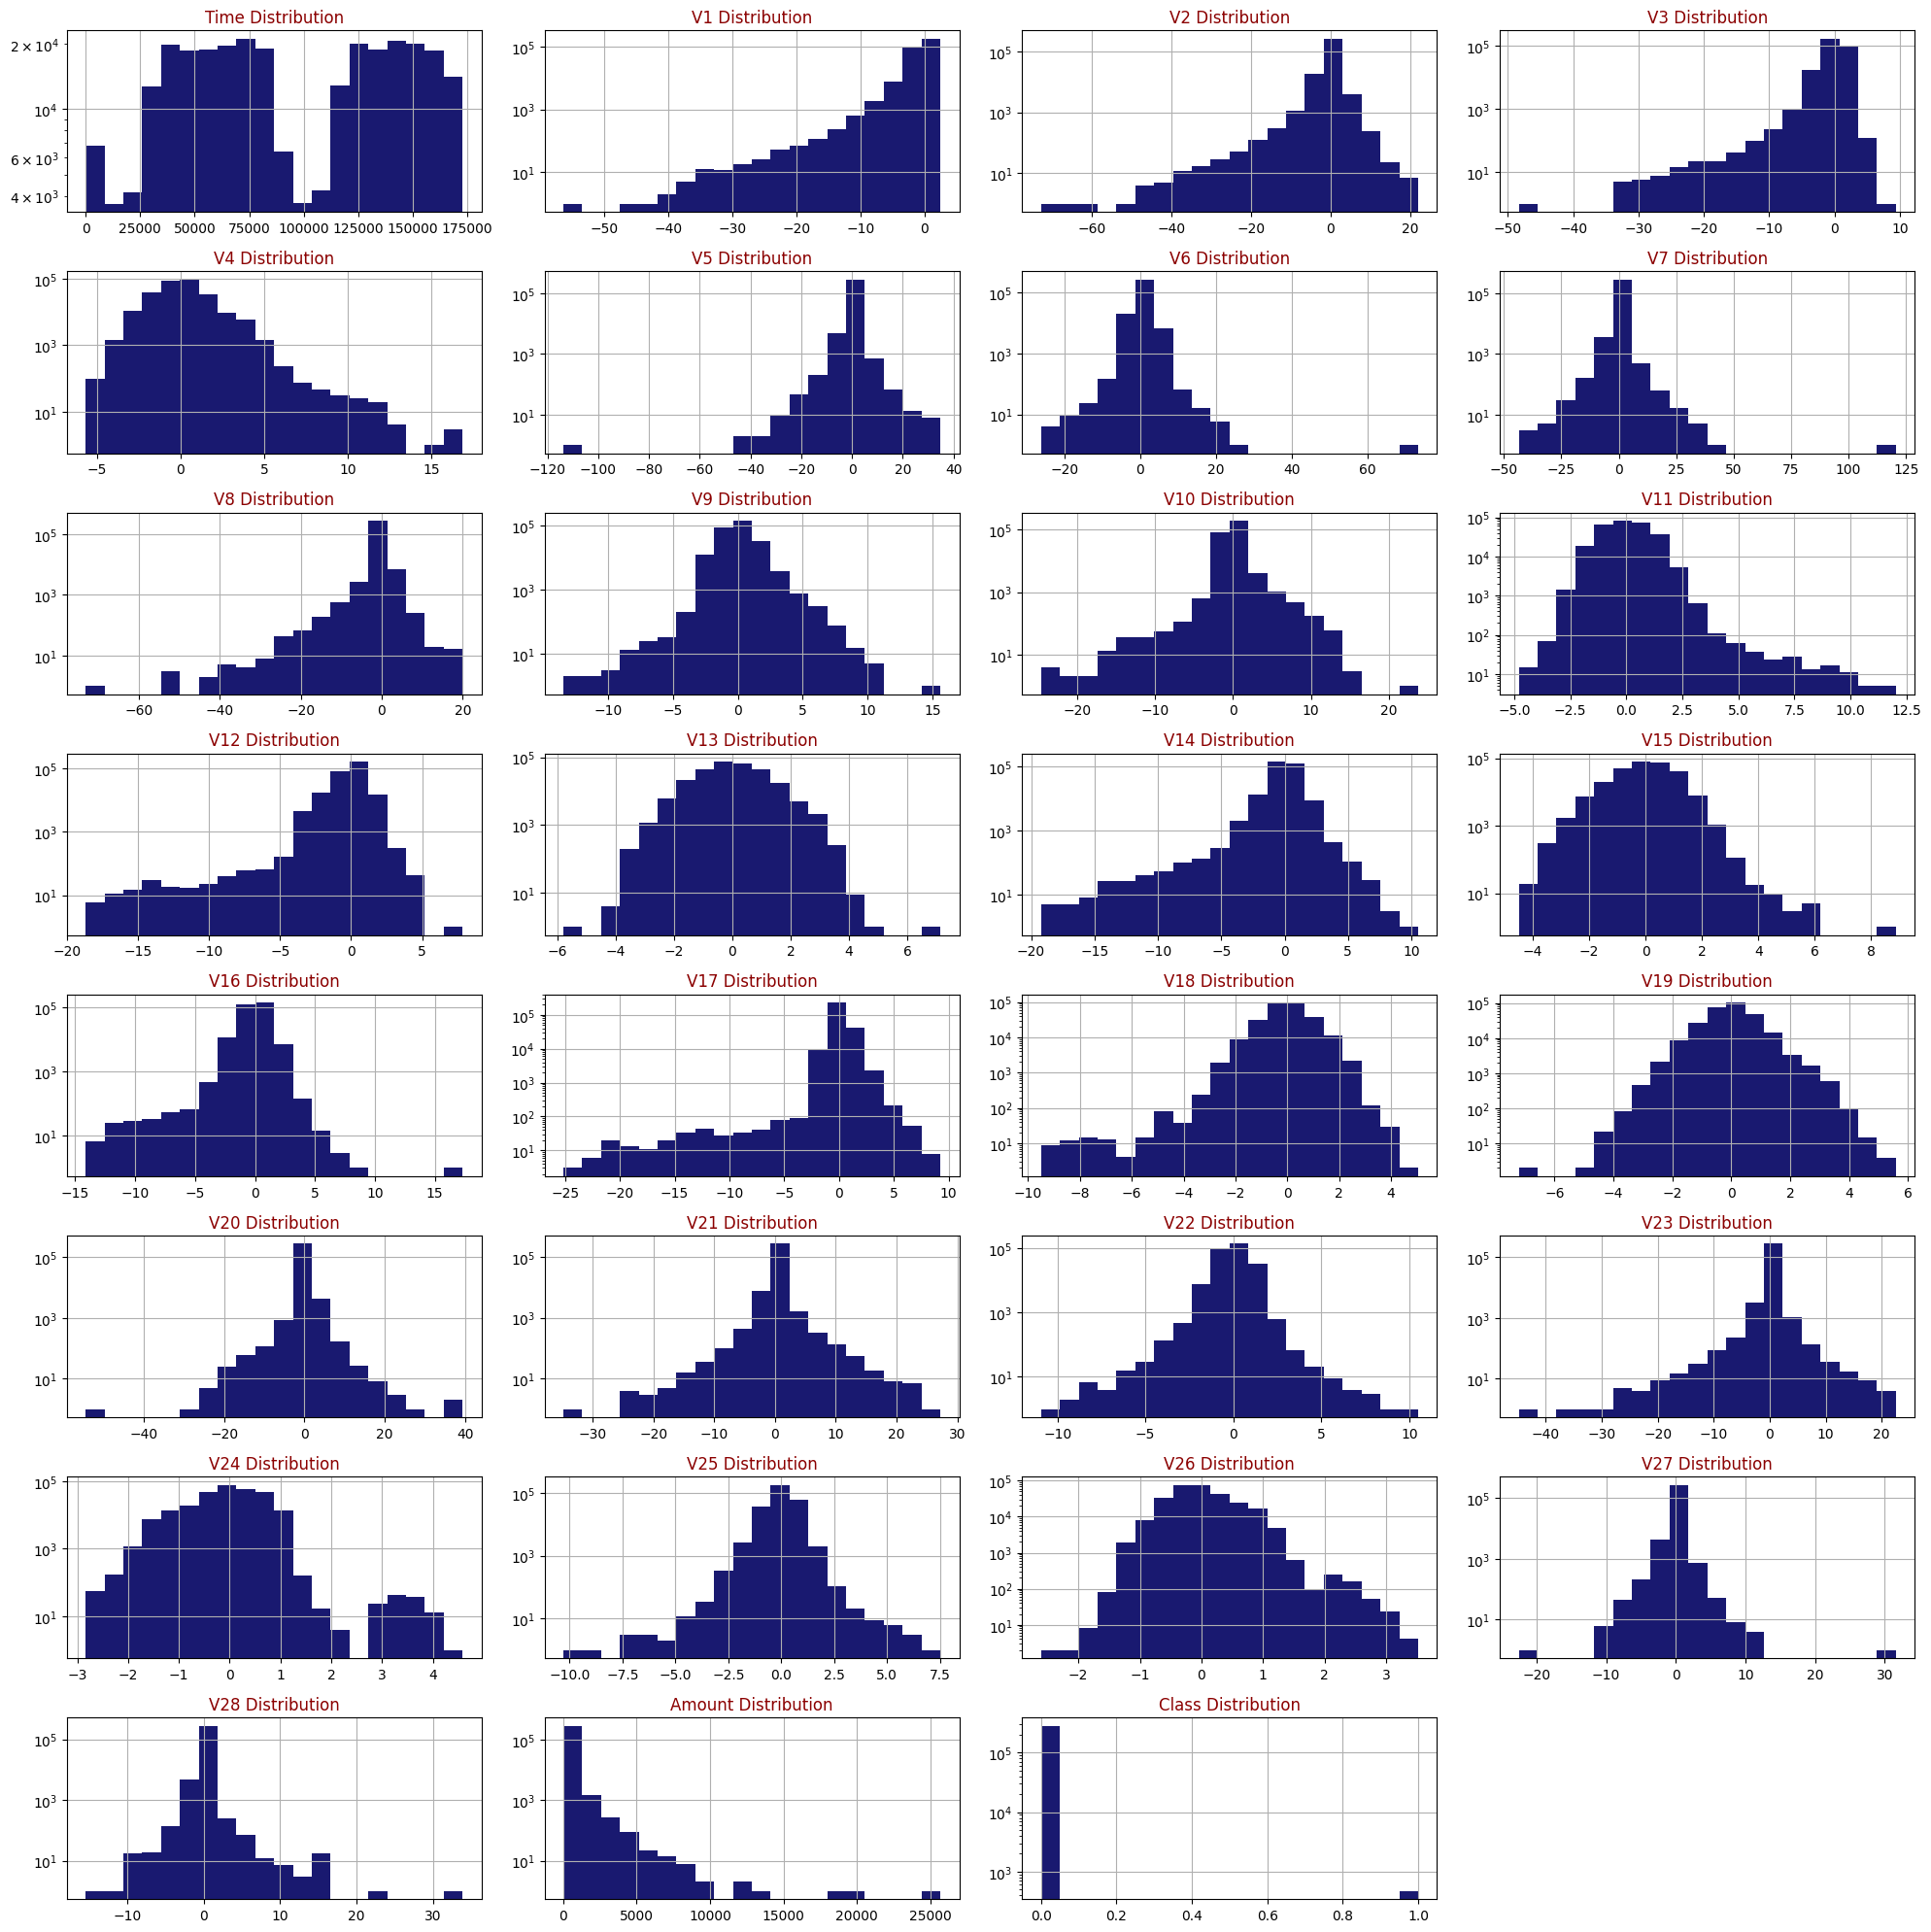

In [10]:
import matplotlib.pyplot as plt

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+' Distribution', color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
    
draw_histograms(card, card.columns, 8,4)

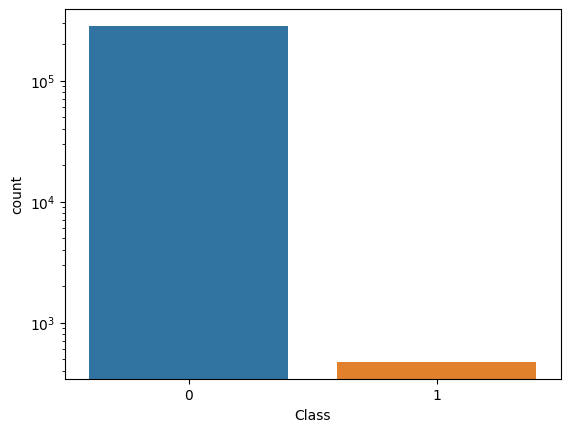

In [11]:
import seaborn as sns
ax=sns.countplot(x='Class', data=card)
ax.set_yscale('log')

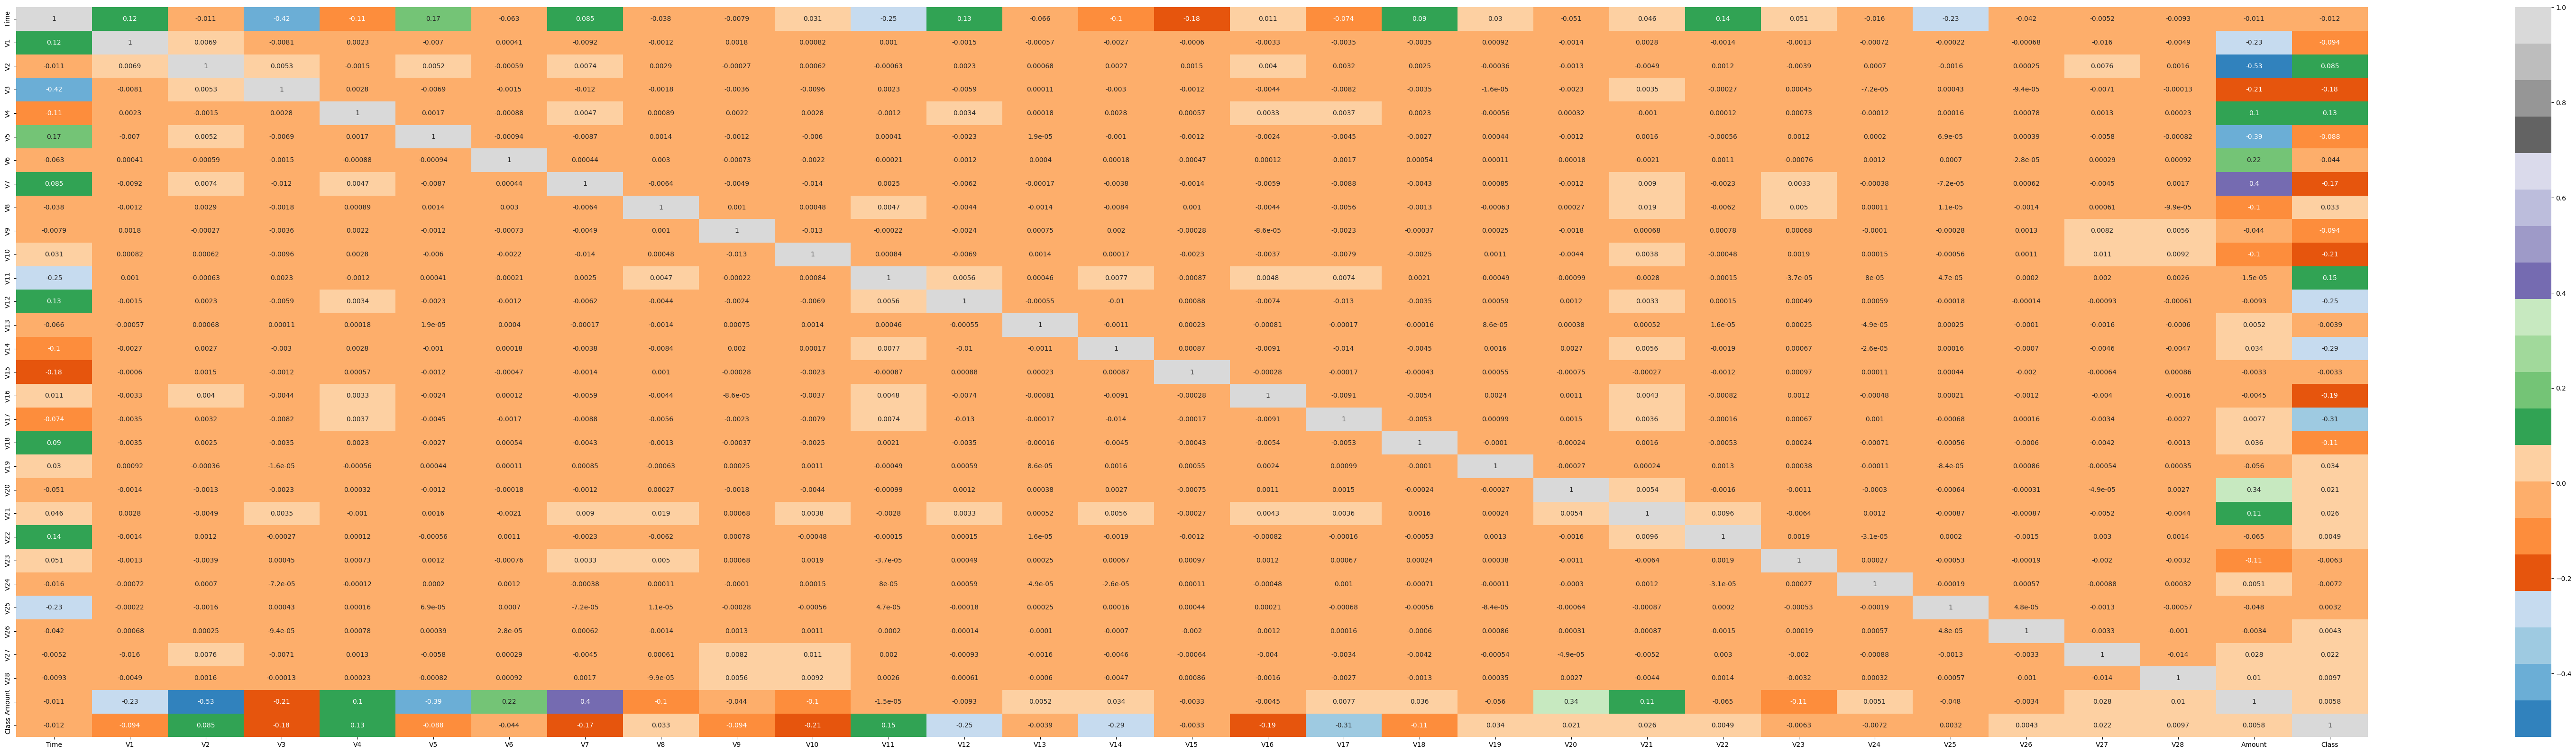

In [12]:
# Check correlation metrix

plt.figure(figsize=(80,20))
sns.heatmap(card.corr(), annot=True, cmap='tab20c')
plt.show()

Modelling With LogisticReggession

In [13]:
estimators = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
             'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X1 = card[estimators]
y = card['Class']

In [14]:
cols = X1.columns[:-1]
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

Using SM (Stats Model's Log Reg) Instead of Sk-lean

In [15]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [16]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Sat, 17 Feb 2024   Pseudo R-squ.:                  0.6819
Time:                        01:03:54   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Feature Sekection : Backward elimination (P-value approach)

In [17]:
def back_feature_elem(data_frame, dep_var, col_list):
    while len(col_list)>0:
        model=sm.Logit(dep_var, data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        
        if largest_pvalue.iloc[0] < (0.05) :
            return result
            break
        else: 
            col_list = col_list.drop(largest_pvalue.index)

result = back_feature_elem(X, card.Class,cols)

Fu ngsi ini berfungsi dengan mengulang proses berikut:

Membangun model regresi logistik menggunakan subset variabel independen yang diberikan.
Melakukan penyesuaian model dan mengevaluasi p-value untuk setiap variabel.
Jika variabel dengan p-value terbesar kurang dari 0.05 (ambang batas signifikansi yang umum digunakan), maka variabel tersebut dianggap signifikan dan fungsi akan mengembalikan hasil model.
Jika tidak ada variabel yang signifikan, maka variabel dengan p-value terbesar akan dihapus dari col_list dan proses akan diulang.
Proses ini akan berlanjut hingga tidak ada lagi variabel yang tersisa untuk dimasukkan ke dalam model.

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Sat, 17 Feb 2024   Pseudo R-squ.:                 0.03183
Time:                        01:04:00   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
new_features = card[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14', 'V15', 
                    'V16', 'V17', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'Class']]


x = new_features.iloc[:,:-1]
y = new_features.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=5, stratify=y)

x_train.shape, y_train.shape, x_test.shape, x_test.shape

((226980, 25), (226980,), (56746, 25), (56746, 25))

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9982377612518945


Confusion Matrix

<Axes: >

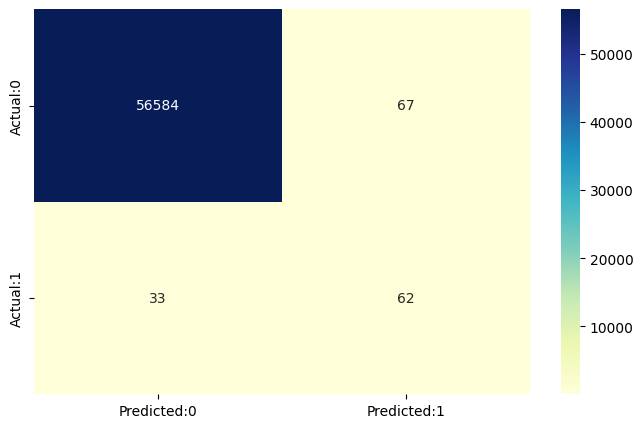

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index = ['Actual:0', 'Actual:1'])

plt.figure(figsize= (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [23]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

Model Evaluation - STatistic

In [24]:
print(
'The summary of the model              = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN), '\n',
'The misclassification                       = 1 - Accuracy = ', 1-(TP+TN)/(TP+TN+FP+FN), '\n',
'Sensitivity or True positivity rate           = TP/(TP+FN) = ', TP/float(TP+FN), '\n',
'Specificity or True  negative rate            = TN/(TN+FP) =', TN/float(TN+FP), '\n',
'Positive predictive value                     = TP/(TP+FP) =', TP/float(TP+FP), '\n',
'Negative predictive value                     = TN/(TN+FN) =', TN/float(TN+FN), '\n',
'Positive Likelihood ratio   = Sensitivity/(1-specificity ) =', sensitivity/(1-specificity), '\n',
'Negative likehood ratio      = (1-Sensitivity/)specificity =', (1-sensitivity)/specificity)

The summary of the model              = TP+TN/(TP+TN+FP+FN) =  0.9982377612518945 
 The misclassification                       = 1 - Accuracy =  0.001762238748105549 
 Sensitivity or True positivity rate           = TP/(TP+FN) =  0.6526315789473685 
 Specificity or True  negative rate            = TN/(TN+FP) = 0.998817320082611 
 Positive predictive value                     = TP/(TP+FP) = 0.4806201550387597 
 Negative predictive value                     = TN/(TN+FN) = 0.9994171361958423 
 Positive Likelihood ratio   = Sensitivity/(1-specificity ) = 551.8243519245702 
 Negative likehood ratio      = (1-Sensitivity/)specificity = 0.34777973315871324


Dari statistik di atas, jelas bahwa model lebih spesifik daripada sensitif. Nilai negatif diprediksi dengan lebih akurat daripada positif. Dalam kasus ini, memprediksi credit card fraud lebih mementingkan prediksi negatif, lebih urgen memprediksi mana transaksi yang fraud dibanding yang tidak walau ini tidak ideal.

In [25]:
y_pred_prob = logreg.predict_proba(x_test)[:, :]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob a Not Fraud (0)', 'Prob of fraud (1)'])
y_pred_prob_df.head()

,Prob a Not Fraud (0),Prob of fraud (1)
0,0.999977,0.000023
1,0.999849,0.000151
2,0.999912,0.000088
3,0.999933,0.000067
4,0.999997,0.000003


In [26]:
from sklearn.preprocessing import binarize

for i in range(0, 11):
    cm2=0
    y_pred_prob_yes = logreg.predict_proba(x_test)
    y_pred2 = binarize(y_pred_prob_yes, threshold= i/10)[:, 1]
    cm2 = confusion_matrix(y_test, y_pred2)
    print('With', i/10, 'threshold the confusion matrix is ', '\n', cm2, '\n',
         'with', cm2[0,0]+cm2[1,1], ' correct predictions and ', cm2[1,0], 'type II errors (false negative)', '\n\n' ,
         'sensitivity', cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Spesificity: ', cm2[0,0]/(float(cm2[0,0]+cm2[0,0])), '\n\n\n')

With 0.0 threshold the confusion matrix is  
 [[    0 56651]
 [    0    95]] 
 with 95  correct predictions and  0 type II errors (false negative) 

 sensitivity 1.0 Spesificity:  nan 



With 0.1 threshold the confusion matrix is  
 [[56157   494]
 [   27    68]] 
 with 56225  correct predictions and  27 type II errors (false negative) 

 sensitivity 0.7157894736842105 Spesificity:  0.5 



With 0.2 threshold the confusion matrix is  
 [[56328   323]
 [   30    65]] 
 with 56393  correct predictions and  30 type II errors (false negative) 

 sensitivity 0.6842105263157895 Spesificity:  0.5 



With 0.3 threshold the confusion matrix is  
 [[56451   200]
 [   31    64]] 
 with 56515  correct predictions and  31 type II errors (false negative) 

 sensitivity 0.6736842105263158 Spesificity:  0.5 



With 0.4 threshold the confusion matrix is  
 [[56552    99]
 [   33    62]] 
 with 56614  correct predictions and  33 type II errors (false negative) 

 sensitivity 0.6526315789473685 Spesif

/tmp/ipykernel_18/203309530.py:10: RuntimeWarning: invalid value encountered in divide
  'sensitivity', cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 'Spesificity: ', cm2[0,0]/(float(cm2[0,0]+cm2[0,0])), '\n\n\n')


ROC curve

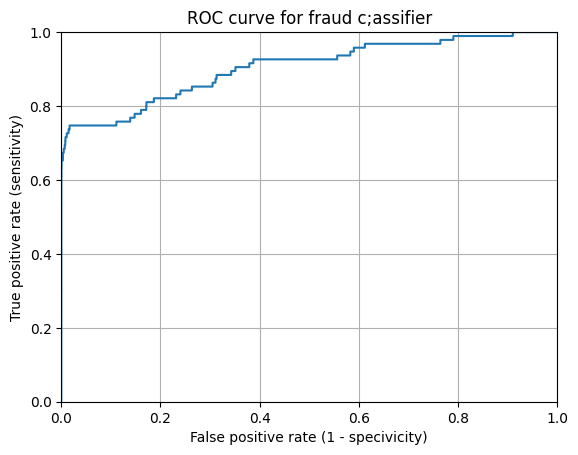

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold, = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fraud c;assifier')
plt.xlabel('False positive rate (1 - specivicity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)